## Classification with Cross Validation

In [1]:
import anoapycore as ap

In [2]:
ap.version()

'0.1.11'

In [3]:
# original file : https://www.kaggle.com/c/titanic/data
v_data_training = ap.data.load.csv(a_filename="D:/_data/titanic/train.csv",a_separator=',')
v_data_testing = ap.data.load.csv("D:/_data/titanic/test.csv")

In [4]:
ap.data.dimension(v_data_training)

891 rows x 12 columns


In [5]:
ap.data.sample(v_data_training)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
ap.data.dimension(v_data_testing)

418 rows x 11 columns


In [7]:
ap.data.sample(v_data_testing)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
ap.data.stat.desc(v_data_training)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
ap.data.stat.desc(v_data_testing)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
v_data_training = ap.data.column.delete(v_data_training,['PassengerId','Name','Ticket','Cabin'])

In [11]:
ap.data.sample(v_data_training)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
v_data_testing = ap.data.column.delete(v_data_testing,['PassengerId','Name','Ticket','Cabin'])

In [13]:
ap.data.sample(v_data_testing)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


### Training Data

#### Replace Missing Values

In [14]:
ap.data.null.count(v_data_training)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [15]:
ap.data.info(v_data_training)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [16]:
help(ap.data.null.replace)

Help on function replace in module anoapycore.data.null:

replace(a_data, a_column, b_method='mean')
    Replace null value with another value.
    The options of b_method are 'mean' (default), 'median'.
    This function has no return.



In [17]:
# Replace missing values of Age attribute with mean
ap.data.null.replace(v_data_training,'Age','mean')

In [18]:
v_data_training

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [19]:
ap.data.null.count(v_data_training)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

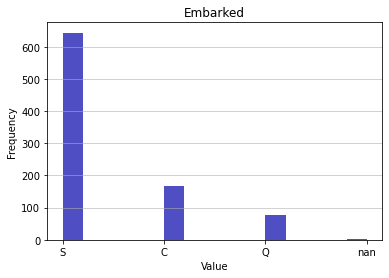

In [20]:
ap.chart.histogram.show(v_data_training,'Embarked')

In [21]:
# Replace missing values of Embarked attribute with mode (as default)
ap.data.null.replace_text(v_data_training,'Embarked','nan')

In [22]:
v_data_training

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


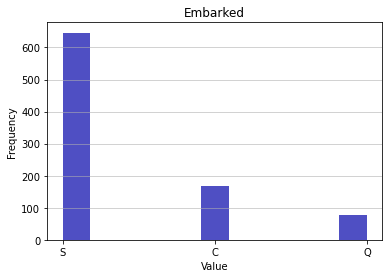

In [23]:
ap.chart.histogram.show(v_data_training,'Embarked')

In [24]:
ap.data.null.count(v_data_training)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [25]:
ap.data.sample(v_data_training)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### Data Encoding

In [26]:
help(ap.data.map)

Help on function map in module anoapycore.data:

map(a_data, a_column, a_old, a_new)
    Map value a_old of a_column in a_data with a_new
    Use [] in a_old and a_new
    a_new must match in length with a_old



In [27]:
ap.data.map(v_data_training,'Embarked',['S','C','Q'],[0,1,2])

In [28]:
ap.data.map(v_data_training,'Sex',['male','female'],[0,1])

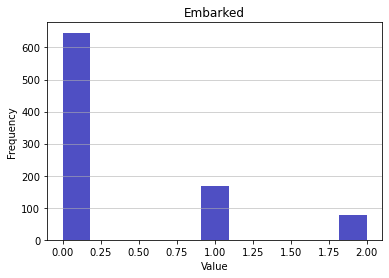

In [29]:
ap.chart.histogram.show(v_data_training,'Embarked')

In [30]:
loc_x = ap.data.deselect(a_data=v_data_training,a_column=['Survived'])

In [31]:
ap.data.sample(loc_x)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [32]:
loc_y = ap.data.select(a_data=v_data_training,a_column=['Survived'])

In [33]:
ap.data.sample(loc_y)

,Survived
0,0
1,1
2,1
3,1
4,0


### Testing Data

In [34]:
ap.data.null.count(v_data_testing)

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [35]:
# Replace missing values of Age attribute with mean
ap.data.null.replace(a_data=v_data_testing,a_column='Age',b_method='mean')

In [36]:
v_data_testing

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [37]:
ap.data.null.count(v_data_testing)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [38]:
# Replace missing values of Fare attribute with mean
ap.data.null.replace(a_data=v_data_testing,a_column='Fare',b_method='mean')

In [39]:
v_data_testing

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [40]:
ap.data.null.count(v_data_testing)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [41]:
ap.data.map(v_data_testing,'Embarked',['S','C','Q'],[0,1,2])

In [42]:
ap.data.map(v_data_testing,'Sex',['male','female'],[0,1])

### Logistic Regression with Cross Validation

In [43]:
# train model from training dataset (train & test)

In [44]:
v_log_reg = ap.mlearn.classification.logreg_cv.run(a_x=loc_x,a_y=loc_y)

In [45]:
v_log_reg.model

LogisticRegressionCV(cv=5, max_iter=1000, random_state=0)

In [46]:
# performance of the model
print(v_log_reg.evals.all)

Accuracy : 0.8035914702581369
Precision : 0.7634069400630915
Recall : 0.7076023391812866


In [47]:
# performance of the model
print('Accuracy : ' + str(v_log_reg.evals.accuracy))
print('Precision : ' + str(v_log_reg.evals.precision))
print('Recall : ' + str(v_log_reg.evals.recall))

Accuracy : 0.8035914702581369
Precision : 0.7634069400630915
Recall : 0.7076023391812866


In [48]:
# predict

In [49]:
loc_predict_logreg = ap.mlearn.classification.logreg_cv.predict(v_log_reg,v_data_testing)

In [50]:
loc_predict_logreg.prediction

,__pred_y
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [51]:
loc_predict_logreg.worksheet

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,__pred_y
0,3,0,34.50000,0,0,7.8292,2,0
1,3,1,47.00000,1,0,7.0000,0,0
2,2,0,62.00000,0,0,9.6875,2,0
3,3,0,27.00000,0,0,8.6625,0,0
4,3,1,22.00000,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0,0
414,1,1,39.00000,0,0,108.9000,1,1
415,3,0,38.50000,0,0,7.2500,0,0
416,3,0,30.27259,0,0,8.0500,0,0


In [52]:
ap.data.save.xls(a_data=loc_predict_logreg.worksheet,a_filename='D:/_result/classification_logreg_cv_titanic.xlsx')